This demo notebook shows how to use the routines in mcbe.py to:

- Given $W\in \mathbb{R}^{m\times n}$, 
apply the Monte Carlo bias estimation (mcbe) on $K=\mathbb{S}_{r},\mathbb{B}_{r},\mathbb{R}^{n},\mathbb{B}_{r} \setminus \mathbb{B}_{k} \text{ with } k<r$ 
to obtain a estimated bias $\alpha^\mathbb{K}$ such that $\operatorname{ReLU}(W\bullet -\alpha^\mathbb{K})$ 
is injective
- Reconstruct $x$ from $y =\operatorname{ReLU}(Wx-\alpha^\mathbb{K})$

In [1]:
import numpy as np
import mcbe
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

Examples: Icosahedron and random frame on the sphere

In [9]:
phi = (1+np.sqrt(5))/2
ico = np.array([[0,1,phi],[0,1,-phi],[0,-1,phi],[0,-1,-phi],
                [1,phi,0],[-1,phi,0],[1,-phi,0],[-1,-phi,0],
                [phi,0,1],[phi,0,-1],[-phi,0,1],[-phi,0,-1]])/(np.sqrt(1+phi**2))
ran = mcbe.norm_row(np.random.randn(12,3))[0]

compute number of sampling points to get epsilon covering radius with epsilon = 0.1

In [10]:
epsilon = 0.25
d = ico.shape[1]
N = mcbe.solve_N(d, epsilon, starting_estimate=100)
print("number of points needed:",N)

number of points needed: 2340


compute $\alpha^\mathbb{K}$ using Monte Carlo Bias Estimation  

alpha^S for a random frame: [0.18243577 0.20113118 0.32116473 0.20008806 0.43778323 0.20438367
 0.50402999 0.21557462 0.25931552 0.31563424 0.21473353 0.00891552]


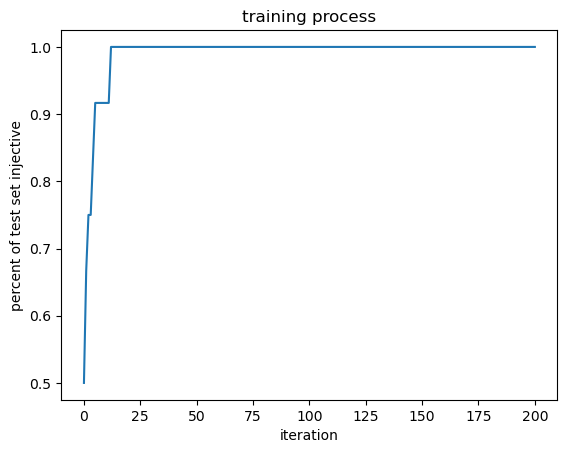

In [12]:
alpha_ran, subframes_ran, points_ran = mcbe.mcbe(ran, N=200, distribution="sphere", give_subframes = True, plot=True, iter_plot=1000, init=True)
print('alpha^S for a random frame:', alpha_ran)

alpha^S for the Icosahedron frame: [0.4472136 0.4472136 0.4472136 0.4472136 0.4472136 0.4472136 0.4472136
 0.4472136 0.4472136 0.4472136 0.4472136 0.4472136]


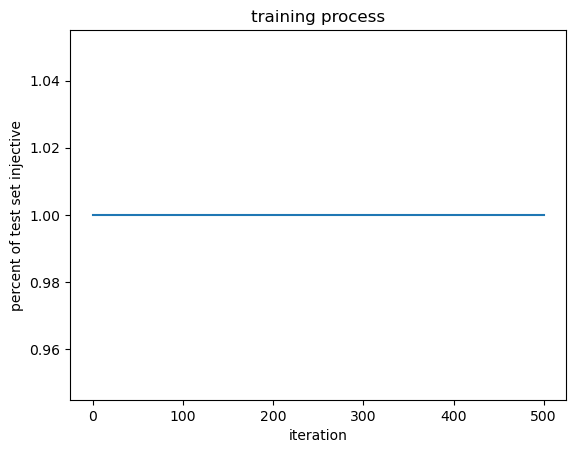

In [13]:
alpha_ico, subframes_ico, points_ico = mcbe.mcbe(ico, N=500, distribution="sphere", give_subframes=True, plot=True,iter_plot=1000)
print('alpha^S for the Icosahedron frame:', alpha_ico)

Error analysis for the icosahedron, where the maximum bias is known to be phi/(1+phi**2)

In [14]:
print('Approximation error: ', np.linalg.norm(alpha_ico - phi/(1+phi**2)))

Approximation error:  1.9229626863835638e-16


reconstruction of a random vector

In [15]:
x_S = mcbe.get_point("sphere",d=3)
x_D = mcbe.get_point("donut",d=3)

z_ico = mcbe.relu(x_S, ico, alpha_ico)
z_ran = mcbe.relu(x_D, ran, alpha_ran)

x_hat_S = mcbe.relu_inv(z_ico, ico, alpha_ico, [list(subf) for subf in list(subframes_ico)])
x_hat_D = mcbe.relu_inv(z_ran, ran, alpha_ran, [list(subf) for subf in list(subframes_ran)])

print('Error on the icosahedron example:', np.linalg.norm(x_S-x_hat_S))
print('Error on the random frame example:', np.linalg.norm(x_D-x_hat_D))

Facet 7 with vertices [3, 6, 7] is used for reconstruction.
Facet 2 with vertices [2, 9, 11] is used for reconstruction.
Error on the icosahedron example: 4.654751537338637e-16
Error on the random frame example: 4.081579843510303e-16
